# Import des librairies

In [2]:
# algèbre linéaire
import numpy as np

# traitement des données
import pandas as pd

# graphiques et visualisation des données
import seaborn as sns
sns.set_theme(style="whitegrid") # style graphique des visualisations
%matplotlib inline
import matplotlib.pyplot as plt

# gestion fichiers et dossiers
import os

# Open URL (ouverture/lecture d'URL)
import urllib.request

# Modification des options

In [ ]:
pd.set_option("display.max_columns", 70)

# Chargement des données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/Data/en.openfoodfacts.org.products.zip'

In [ ]:
import zipfile
zf = zipfile.ZipFile(zip_path)

In [ ]:
open_food_facts_data = pd.read_csv(zf.open('en.openfoodfacts.org.products.csv'), sep="\t")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,8,13,27,28,29,31,47,52,64,97) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
open_food_facts_data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,...,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,100g,NaN,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,en:mustard,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,dgesc,NaN,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
open_food_facts_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648410 entries, 0 to 1648409
Columns: 184 entries, code to carnitine_100g
dtypes: float64(121), int64(2), object(61)
memory usage: 8.5 GB


In [ ]:
open_food_facts_data.describe(include='all')

# Sélection des variables

In [ ]:
# Variables inutiles pour l'étude : de 'code' à 'image_nutrition_small_url'
# Variables avec aucune donnée : de 'cities' à 'water-hardness_100g'
# Variables avec 100 valeurs au max : de '-butyric-acid_100g' à 'carnitine_100g'
variablesEcartees = ["code", "url", "creator", "created_t", "created_datetime", "last_modified_t",
                     "last_modified_datetime", "quantity", "packaging", "packaging_tags", "packaging_text",
                     "first_packaging_code_geo", "allergens", "allergens_en", "traces", "traces_tags", 
                     "traces_en", "states", "states_tags", "states_en", "image_url", "image_small_url", 
                     "image_ingredients_url", "image_ingredients_small_url", "image_nutrition_url", 
                     "image_nutrition_small_url", "cities", "no_nutriments", "ingredients_from_palm_oil",
                     "ingredients_that_may_be_from_palm_oil", "-lignoceric-acid_100g", "nutrition-score-uk_100g",
                     "water-hardness_100g", "-butyric-acid_100g", "-caproic-acid_100g", "-caprylic-acid_100g",
                     "-capric-acid_100g", "-lauric-acid_100g", "-myristic-acid_100g", "-palmitic-acid_100g",
                     "-stearic-acid_100g", "-arachidic-acid_100g", "-behenic-acid_100g", "-cerotic-acid_100g",
                     "-montanic-acid_100g", "-melissic-acid_100g", "-arachidonic-acid_100g", "-gamma-linolenic-acid_100g",
                     "-dihomo-gamma-linolenic-acid_100g", "omega-9-fat_100g", "-oleic-acid_100g", "-elaidic-acid_100g",
                     "-gondoic-acid_100g", "-mead-acid_100g", "-erucic-acid_100g", "-nervonic-acid_100g", "-glucose_100g",
                     "-fructose_100g", "-lactose_100g", "-maltose_100g", "-maltodextrins_100g", "casein_100g", 
                     "serum-proteins_100g", "nucleotides_100g", "beta-carotene_100g", "chlorophyl_100g", "choline_100g", 
                     "beta-glucan_100g", "inositol_100g", "carnitine_100g"]


selectionColonnes = [colonne for colonne in open_food_facts_data.columns.values if colonne not in variablesEcartees]

In [ ]:
open_food_facts_data = open_food_facts_data[selectionColonnes]

In [ ]:
open_food_facts_data.head()

,product_name,abbreviated_product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,serving_quantity,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,phylloquinone_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,moutarde au moût de raisin,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,18.0,d,NaN,Fat and sauces,Dressings and sauces,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
4,Sfiudwx,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filtre des données France (produits vendus en France)

In [ ]:
open_food_facts_data = open_food_facts_data[open_food_facts_data['countries_en'] == 'France']

In [ ]:
open_food_facts_data.describe()

# Optimisation de l'usage de la mémoire

In [ ]:
open_food_facts_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700690 entries, 0 to 1648409
Columns: 114 entries, product_name to phylloquinone_100g
dtypes: float64(76), object(38)
memory usage: 1.7 GB


Gain de *81%* de mémoire après la suppression des variables inutiles et (quasi) vides. Avant : *8.5 GB*, après : *1.6 GB*.

On peut remarquer que la variable *-eicosapentaenoic-acid_100g* est considérée comme *object* alors qu'elle est censée être un *float*.

In [ ]:
pd.set_option("display.max_rows", None)
open_food_facts_data.groupby('-eicosapentaenoic-acid_100g').size()

Elle ne contient que des nombres décimaux malgré son encodage. Je vais le modifier en float64.

In [ ]:
# Remise de l'option par défaut
pd.set_option("display.max_rows", 20)
open_food_facts_data['-eicosapentaenoic-acid_100g'] = open_food_facts_data['-eicosapentaenoic-acid_100g'].astype('float64')

In [ ]:
open_food_facts_data['-eicosapentaenoic-acid_100g'].dtypes

dtype('float64')

In [ ]:
open_food_facts_data.describe(include='all')

## Modification des formats de données

### Variables de type object

In [ ]:
# Attention : gourmand en RAM
open_food_facts_data.select_dtypes(include=['object']).describe() 

In [ ]:
# Modification des types de variables en 'category' pour les 'objects'
# si le nombre de modalités < 50% du nombre d'individus
def convertir_object_en_category(df_obj):

  converted_obj = pd.DataFrame()

  for col in df_obj.columns:
      if len(df_obj[col].unique()) / len(df_obj[col]) < 0.5:
          converted_obj.loc[:,col] = df_obj[col].astype('category')
      else:
          converted_obj.loc[:,col] = df_obj[col]

  return converted_obj


In [ ]:
converted_obj = convertir_object_en_category(open_food_facts_data.select_dtypes(include=['object']))

In [ ]:
converted_obj.dtypes

product_name                  object
abbreviated_product_name    category
generic_name                category
brands                      category
brands_tags                 category
                              ...   
pnns_groups_1               category
pnns_groups_2               category
brand_owner                 category
main_category               category
main_category_en            category
Length: 37, dtype: object

In [ ]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep=True)    
    
    # convertir les bytes en megabytes
    usage_mb = usage_b / 1024 ** 2 
    
    # afficher sous format nombre (min 3 chiffres) et une précision de deux décimales
    return "{:03.2f} MB".format(usage_mb)

In [ ]:
print(mem_usage(open_food_facts_data.select_dtypes(include=['object'])))
print(mem_usage(converted_obj))

1273.39 MB
280.98 MB


### Variables de type float

In [ ]:
# Attention : gourmand en RAM
open_food_facts_data.select_dtypes(include=['float']).describe()

In [ ]:
open_food_facts_data.select_dtypes(include=['float']).info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700690 entries, 0 to 1648409
Data columns (total 77 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   serving_quantity                         56687 non-null   float64
 1   additives_n                              201930 non-null  float64
 2   ingredients_from_palm_oil_n              201930 non-null  float64
 3   ingredients_that_may_be_from_palm_oil_n  201930 non-null  float64
 4   nutriscore_score                         228371 non-null  float64
 5   nova_group                               167562 non-null  float64
 6   energy-kj_100g                           56901 non-null   float64
 7   energy-kcal_100g                         520673 non-null  float64
 8   energy_100g                              546734 non-null  float64
 9   energy-from-fat_100g                     30 non-null      float64
 10  fat_100g                       

In [ ]:
# Conversion des float64 en float32
converted_float = open_food_facts_data.select_dtypes(include=['float']).apply(pd.to_numeric, downcast='float')
converted_float.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700690 entries, 0 to 1648409
Data columns (total 77 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   serving_quantity                         56687 non-null   float32
 1   additives_n                              201930 non-null  float32
 2   ingredients_from_palm_oil_n              201930 non-null  float32
 3   ingredients_that_may_be_from_palm_oil_n  201930 non-null  float32
 4   nutriscore_score                         228371 non-null  float32
 5   nova_group                               167562 non-null  float32
 6   energy-kj_100g                           56901 non-null   float32
 7   energy-kcal_100g                         520673 non-null  float32
 8   energy_100g                              546734 non-null  float32
 9   energy-from-fat_100g                     30 non-null      float32
 10  fat_100g                       

### Regroupement des données optimisées dans un dataframe

In [ ]:
optimized_df = pd.DataFrame()

In [ ]:
optimized_df[converted_obj.columns] = converted_obj
optimized_df[converted_float.columns] = converted_float

In [ ]:
optimized_df

,product_name,abbreviated_product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,additives,additives_tags,additives_en,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,main_category,main_category_en,serving_quantity,additives_n,ingredients_from_palm_oil_n,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,phylloquinone_100g
0,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,moutarde au moût de raisin,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,NaN,NaN,NaN,NaN,d,Fat and sauces,Dressings and sauces,NaN,en:mustards,Mustards,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
4,Sfiudwx,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,fr:xsf,fr:xsf,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648399,Minis beignets,NaN,Beignets natures sucrés,NaN,NaN,"Snacks, Snacks sucrés, Beignets sucrés","en:snacks,en:sweet-snacks,en:sweet-fritters","Snacks,Sweet snacks,Sweet Fritters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown

In [ ]:
print(mem_usage(open_food_facts_data))
print(mem_usage(optimized_df))

1685.02 MB
486.80 MB


Avec le jeu de données contenant les variables utiles et non vides, on passe de *4.0 GB* à *1.2 GB* soit un gain de mémoire de *70%*. À noter qu'on obtient un gain de *85%* sur le jeu de données de départ.

### Construction du dictionnaire du type de données

In [ ]:
# À voir si je l'utilise
dtypes = optimized_df.dtypes
column_types = dict(zip(dtypes.index, [i.name for i in dtypes.values]))
print(column_types)

{'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'brands': 'category', 'brands_tags': 'category', 'categories': 'category', 'categories_tags': 'category', 'categories_en': 'category', 'origins': 'category', 'origins_tags': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 'manufacturing_places_tags': 'category', 'labels': 'category', 'labels_tags': 'category', 'labels_en': 'category', 'emb_codes': 'category', 'emb_codes_tags': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 'stores': 'category', 'countries': 'category', 'countries_tags': 'category', 'countries_en': 'category', 'ingredients_text': 'category', 'serving_size': 'category', 'additives': 'category', 'additives_tags': 'category', 'additives_en': 'category', 'ingredients_from_palm_oil_tags': 'category', 'ingredients_that_may_be_from_palm_oil_tags': 'category', 'nutriscore_grade': 'category', 'pnns_groups_1': 'category', 'pnns_groups_2':

## Export des données optimisées

### Vers un CSV

In [ ]:
path = '/content/drive/MyDrive/Data/openfoodfacts_optimized_data.csv'
optimized_df.to_csv(path, sep="\t")

### Vers un HDF5

In [ ]:
# À voir plus tard
path_hdf = '/content/drive/MyDrive/Data/openfoodfacts_optimized_data.h5'
optimized_df.to_hdf(path_hdf, key="optimized_df", format="table")

# Chargement des données optimisées

Les données optimisées contiennent uniquement des produits vendus en France. De plus, elles ne présentent que des colonnes qui peuvent être utiles à l'analyse et l'application. Celles-ci contiennent au minimum 100 valeurs avant la suppression des produits vendus à l'étranger.

In [3]:
path = '/content/drive/MyDrive/Data/openfoodfacts_optimized_data.csv'
data_types = {'product_name': 'object', 'abbreviated_product_name': 'category', 'generic_name': 'category', 'brands': 'category', 
              'brands_tags': 'category', 'categories': 'category', 'categories_tags': 'category', 'categories_en': 'category', 
              'origins': 'category', 'origins_tags': 'category', 'origins_en': 'category', 'manufacturing_places': 'category', 
              'manufacturing_places_tags': 'category', 'labels': 'category', 'labels_tags': 'category', 'labels_en': 'category', 
              'emb_codes': 'category', 'emb_codes_tags': 'category', 'cities_tags': 'category', 'purchase_places': 'category', 
              'stores': 'category', 'countries': 'category', 'countries_tags': 'category', 'countries_en': 'category', 
              'ingredients_text': 'category', 'serving_size': 'category', 'additives': 'category', 'additives_tags': 'category', 
              'additives_en': 'category', 'ingredients_from_palm_oil_tags': 'category', 
              'ingredients_that_may_be_from_palm_oil_tags': 'category', 'nutriscore_grade': 'category', 
              'pnns_groups_1': 'category', 'pnns_groups_2': 'category', 'brand_owner': 'category', 'main_category': 'category', 
              'main_category_en': 'category', 'cities': 'float32', 'serving_quantity': 'float32', 'no_nutriments': 'float32', 
              'additives_n': 'float32', 'ingredients_from_palm_oil_n': 'float32', 'ingredients_from_palm_oil': 'float32', 
              'ingredients_that_may_be_from_palm_oil_n': 'float32', 'ingredients_that_may_be_from_palm_oil': 'float32', 
              'nutriscore_score': 'float32', 'nova_group': 'float32', 'energy-kj_100g': 'float32', 'energy-kcal_100g': 'float32', 
              'energy_100g': 'float32', 'energy-from-fat_100g': 'float32', 'fat_100g': 'float32', 'saturated-fat_100g': 'float32', 
              '-butyric-acid_100g': 'float32', '-caproic-acid_100g': 'float32', '-caprylic-acid_100g': 'float32', 
              '-capric-acid_100g': 'float32', '-lauric-acid_100g': 'float32', '-myristic-acid_100g': 'float32', 
              '-palmitic-acid_100g': 'float32', '-stearic-acid_100g': 'float32', '-arachidic-acid_100g': 'float32', 
              '-behenic-acid_100g': 'float32', '-lignoceric-acid_100g': 'float32', '-cerotic-acid_100g': 'float32', 
              '-montanic-acid_100g': 'float32', '-melissic-acid_100g': 'float32', 'monounsaturated-fat_100g': 'float32', 
              'polyunsaturated-fat_100g': 'float32', 'omega-3-fat_100g': 'float32', '-alpha-linolenic-acid_100g': 'float32', 
              '-eicosapentaenoic-acid_100g': 'float32', '-docosahexaenoic-acid_100g': 'float32', 'omega-6-fat_100g': 'float32', 
              '-linoleic-acid_100g': 'float32', '-arachidonic-acid_100g': 'float32', '-gamma-linolenic-acid_100g': 'float32', 
              '-dihomo-gamma-linolenic-acid_100g': 'float32', 'omega-9-fat_100g': 'float32', '-oleic-acid_100g': 'float32', 
              '-elaidic-acid_100g': 'float32', '-gondoic-acid_100g': 'float32', '-mead-acid_100g': 'float32', 
              '-erucic-acid_100g': 'float32', '-nervonic-acid_100g': 'float32', 'trans-fat_100g': 'float32', 
              'cholesterol_100g': 'float32', 'carbohydrates_100g': 'float32', 'sugars_100g': 'float32', '-sucrose_100g': 'float32', 
              '-glucose_100g': 'float32', '-fructose_100g': 'float32', '-lactose_100g': 'float32', '-maltose_100g': 'float32', 
              '-maltodextrins_100g': 'float32', 'starch_100g': 'float32', 'polyols_100g': 'float32', 'fiber_100g': 'float32', 
              '-soluble-fiber_100g': 'float32', '-insoluble-fiber_100g': 'float32', 'proteins_100g': 'float32', 
              'casein_100g': 'float32', 'serum-proteins_100g': 'float32', 'nucleotides_100g': 'float32', 'salt_100g': 'float32',
              'sodium_100g': 'float32', 'alcohol_100g': 'float32', 'vitamin-a_100g': 'float32', 'beta-carotene_100g': 'float32', 
              'vitamin-d_100g': 'float32', 'vitamin-e_100g': 'float32', 'vitamin-k_100g': 'float32', 'vitamin-c_100g': 'float32', 
              'vitamin-b1_100g': 'float32', 'vitamin-b2_100g': 'float32', 'vitamin-pp_100g': 'float32', 
              'vitamin-b6_100g': 'float32', 'vitamin-b9_100g': 'float32', 'folates_100g': 'float32', 'vitamin-b12_100g': 'float32', 
              'biotin_100g': 'float32', 'pantothenic-acid_100g': 'float32', 'silica_100g': 'float32', 'bicarbonate_100g': 'float32', 
              'potassium_100g': 'float32', 'chloride_100g': 'float32', 'calcium_100g': 'float32', 'phosphorus_100g': 'float32', 
              'iron_100g': 'float32', 'magnesium_100g': 'float32', 'zinc_100g': 'float32', 'copper_100g': 'float32', 
              'manganese_100g': 'float32', 'fluoride_100g': 'float32', 'selenium_100g': 'float32', 'chromium_100g': 'float32',
              'molybdenum_100g': 'float32', 'iodine_100g': 'float32', 'caffeine_100g': 'float32', 'taurine_100g': 'float32', 
              'ph_100g': 'float32', 'fruits-vegetables-nuts_100g': 'float32', 'fruits-vegetables-nuts-dried_100g': 'float32', 
              'fruits-vegetables-nuts-estimate_100g': 'float32', 'collagen-meat-protein-ratio_100g': 'float32', 
              'cocoa_100g': 'float32', 'chlorophyl_100g': 'float32', 'carbon-footprint_100g': 'float32', 
              'carbon-footprint-from-meat-or-fish_100g': 'float32', 'nutrition-score-fr_100g': 'float32', 
              'nutrition-score-uk_100g': 'float32', 'glycemic-index_100g': 'float32', 'water-hardness_100g': 'float32', 
              'choline_100g': 'float32', 'phylloquinone_100g': 'float32', 'beta-glucan_100g': 'float32', 
              'inositol_100g': 'float32', 'carnitine_100g': 'float32'}
open_food_facts_optimized_data = pd.read_csv(path, dtype=data_types, sep="\t")

In [4]:
open_food_facts_optimized_data

,Unnamed: 0,product_name,abbreviated_product_name,generic_name,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,serving_size,additives,additives_tags,additives_en,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,brand_owner,main_category,main_category_en,serving_quantity,additives_n,...,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,glycemic-index_100g,phylloquinone_100g
0,0,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,moutarde au moût de raisin,NaN,NaN,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",NaN,NaN,NaN,NaN,NaN,Delois france,fr:delois-france,fr:delois-france,NaN,NaN,NaN,NaN,courte paille,France,en:france,France,eau graines de téguments de moutarde vinaigre ...,NaN,NaN,NaN,NaN,NaN,NaN,d,Fat and sauces,Dressings and sauces,NaN,en:mustards,Mustards,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN
3,4,Sfiudwx,NaN,NaN,Watt,watt,Xsf,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,fr:xsf,fr:xsf,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700685,1648399,Minis beignets,NaN,Beignets natures sucrés,NaN,NaN,"Snacks, Snacks sucrés, Beignets sucrés","en:snacks,en:sweet-snacks,en:sweet-fritters","Snacks,Sweet snacks,Sweet Fritters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d,unknown,unknown,NaN,en:swee

In [5]:
numero_derniere_colonne = len(open_food_facts_optimized_data.columns)
open_food_facts_optimized_data = open_food_facts_optimized_data.iloc[:, 1:numero_derniere_colonne]

In [6]:
open_food_facts_optimized_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Columns: 114 entries, product_name to phylloquinone_100g
dtypes: category(36), float32(77), object(1)
memory usage: 537.6 MB


# Sélection des variables pertinentes

## Suppression des variables avec au moins 80% de données manquantes

In [7]:
def compter_donnees_manquantes(dataset):
  return pd.DataFrame({'nombre': dataset.isnull().sum()})

In [8]:
def trier_nombre_donnees_manquantes(tableau):
  return tableau.sort_values(by=['nombre'], ascending=False)

In [9]:
def visualiser_donnees_manquantes(tableau_trie, volumetrie, seuil=0.8):
  plt.rcParams["figure.figsize"] = (12, 30)
  plt.barh(tableau_trie.index, tableau_trie.nombre)
  plt.xlabel('Nombre de données manquantes')
  plt.ylabel('Variables')
  plt.title('Nombre de données manquantes parmi le dataset')
  plt.vlines(seuil*volumetrie, ymin=-1, ymax=113, colors='r') # valeurs de ymin et ymax à automatiser

In [ ]:
# pas forcément utile car besoin d'utiliser le tableau 'nb_donnees_manquantes_df'
# par la suite pour voir les valeurs et supprimer les variables qui dépassent le seuil
### à supprimer ? ###
def etudier_nombre_donnees_manquantes(dataset):
  nb_donnees_manquantes_df = compter_donnees_manquantes(dataset)
  nb_donnees_manquantes_df = trier_nombre_donnees_manquantes(nb_donnees_manquantes_df)
  nb_donnees_manquantes_df.head(20)
  visualiser_donnees_manquantes(nb_donnees_manquantes_df, len(dataset))

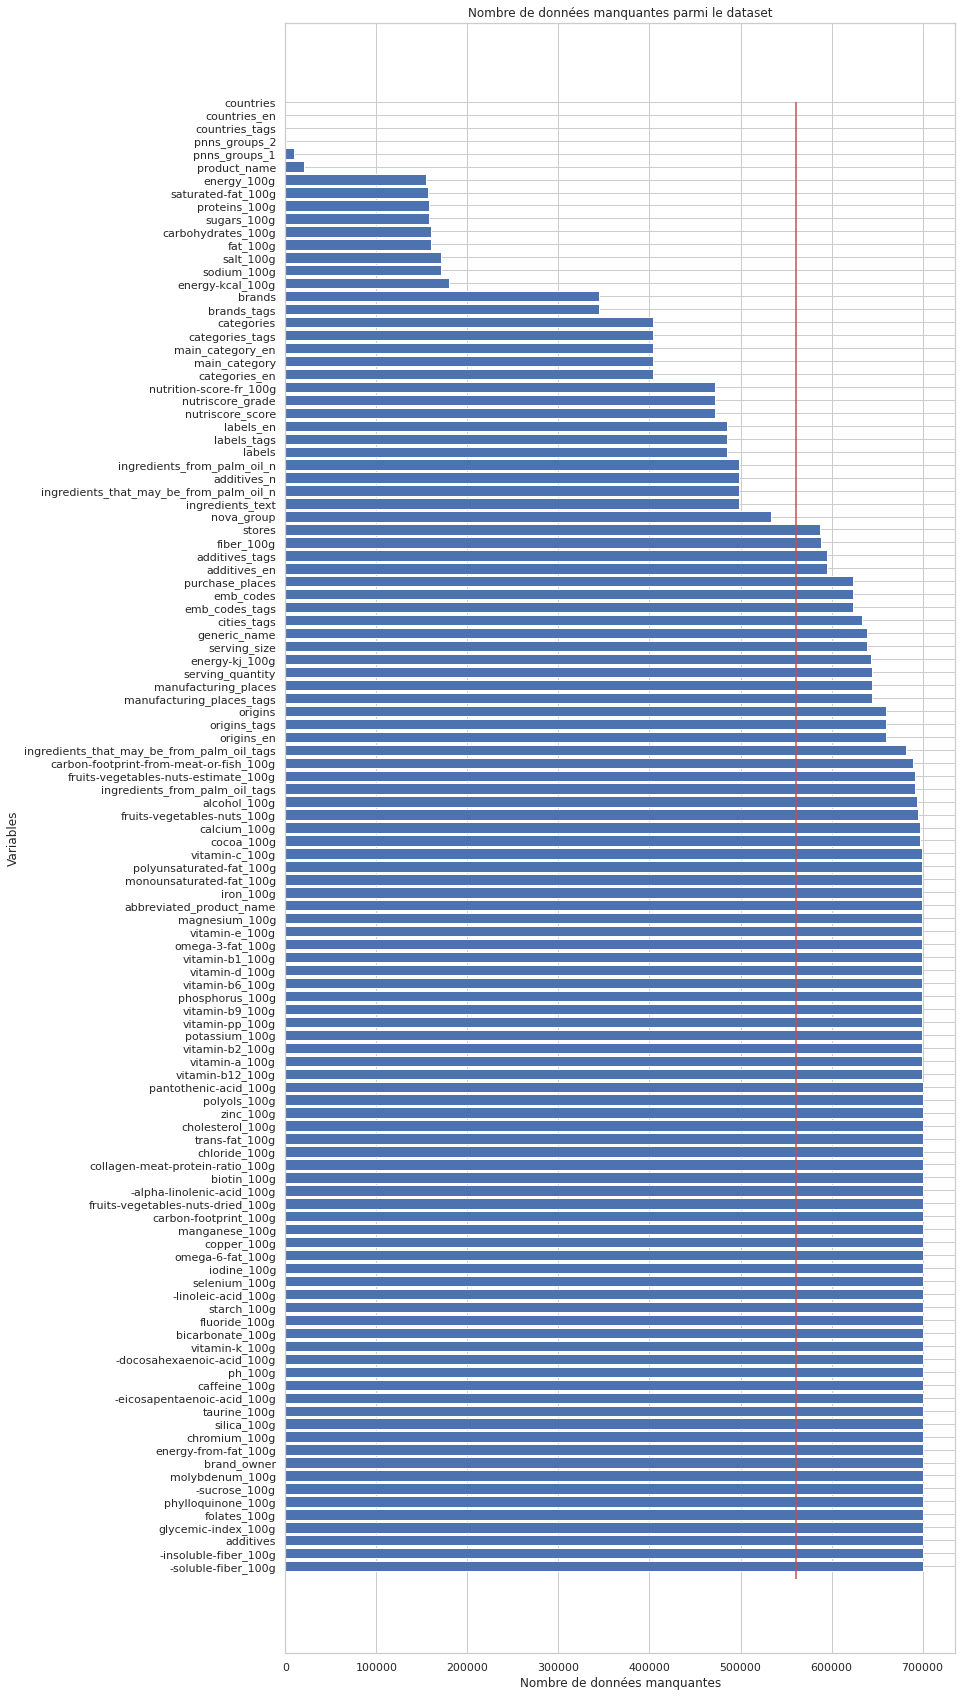

In [10]:
nb_donnees_manquantes_df = compter_donnees_manquantes(open_food_facts_optimized_data)
nb_donnees_manquantes_df = trier_nombre_donnees_manquantes(nb_donnees_manquantes_df)
visualiser_donnees_manquantes(nb_donnees_manquantes_df, len(open_food_facts_optimized_data))

Les variables contenant au moins 80% de données manquantes seront supprimées exceptées les suivantes :
* 'stores'
* 'fiber_100g'
* 'additives_tags' 
* 'additives_en'
* 'manufacturing_places'
* 'manufacturing_places_tags'
* 'origins'
* 'origins_tags'
* 'origins_en'

En effet, ces variables présentent un intérêt dans le cadre de mon application autour des additifs.



### Identification des variables à supprimer

In [ ]:
nb_donnees_manquantes_df

,nombre
-soluble-fiber_100g,700690
-insoluble-fiber_100g,700690
additives,700688
glycemic-index_100g,700687
folates_100g,700687
...,...
pnns_groups_1,9695
pnns_groups_2,105
countries_tags,0
countries_en,0


In [11]:
nb_donnees_manquantes_df['seuil'] = 0.8*700690

In [12]:
variables_exceptions = ['stores',
                        'fiber_100g',
                        'additives_tags',
                        'additives_en',
                        'manufacturing_places',
                        'manufacturing_places_tags',
                        'origins',
                        'origins_tags',
                        'origins_en']

In [13]:
nb_donnees_manquantes_df = nb_donnees_manquantes_df.assign(flg_depasse_seuil=lambda df: df.nombre > df.seuil,
                                                           flg_est_exception=False)

In [14]:
nb_donnees_manquantes_df.loc[variables_exceptions, 'flg_est_exception'] = True

In [15]:
nb_donnees_manquantes_df = nb_donnees_manquantes_df.assign(flg_est_ecartee=lambda df: df.flg_depasse_seuil & ~df.flg_est_exception)

In [16]:
nb_donnees_manquantes_df.loc[variables_exceptions]

,nombre,seuil,flg_depasse_seuil,flg_est_exception,flg_est_ecartee
stores,587572,560552.0,True,True,False
fiber_100g,588032,560552.0,True,True,False
additives_tags,595118,560552.0,True,True,False
additives_en,595118,560552.0,True,True,False
manufacturing_places,644274,560552.0,True,True,False
manufacturing_places_tags,644308,560552.0,True,True,False
origins,659693,560552.0,True,True,False
origins_tags,659747,560552.0,True,True,False
origins_en,659747,560552.0,True,True,False


In [ ]:
nb_donnees_manquantes_df

,nombre,seuil,flg_depasse_seuil,flg_est_exception,flg_est_ecartee
-soluble-fiber_100g,700690,560552.0,True,False,True
-insoluble-fiber_100g,700690,560552.0,True,False,True
additives,700688,560552.0,True,False,True
glycemic-index_100g,700687,560552.0,True,False,True
folates_100g,700687,560552.0,True,False,True
...,...,...,...,...,...
pnns_groups_1,9695,560552.0,False,False,False
pnns_groups_2,105,560552.0,False,False,False
countries_tags,0,560552.0,False,False,False
countries_en,0,560552.0,False,False,False


In [17]:
variables_ecartees = nb_donnees_manquantes_df[nb_donnees_manquantes_df['flg_est_ecartee']].index.values # tolist() si besoin

### Suppression des variables identifées

In [18]:
variables_conservees = [variable for variable in open_food_facts_optimized_data.columns.values 
                                    if variable not in variables_ecartees]

In [19]:
open_food_facts_optimized_data = open_food_facts_optimized_data[variables_conservees]

In [ ]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   product_name                             680448 non-null  object  
 1   brands                                   355862 non-null  category
 2   brands_tags                              355831 non-null  category
 3   categories                               296954 non-null  category
 4   categories_tags                          296954 non-null  category
 5   categories_en                            296954 non-null  category
 6   origins                                  40997 non-null   category
 7   origins_tags                             40943 non-null   category
 8   origins_en                               40943 non-null   category
 9   manufacturing_places                     56416 non-null   category
 10  manufacturing_places

Après la suppression des variables contenant au moins 80% de données manquantes, hormis les exceptions. Je me retrouve avec des variables s'apparentant à des doublons telles que :
* 'brands' et 'brands_tags' (1)
* 'categories', 'categories_tags' et 'categories_en' (2)
* 'origins', 'origins_tags' et 'origins_en' (3)
* 'manufacturing_places' et 'manufacturing_places_tags' (4)
* 'labels', 'labels_tags' et 'labels_en' (5)
* 'countries', 'countries_tags' et 'countries_en' (6)
* 'additives_tags' et 'additives_en' (7)
* 'pnns_groups_1' et 'pnns_groups_2' (8)
* 'main_category' et 'main_category_en' (9)
* 'nutriscore_score' et 'nutrition-score-fr_100g' (10)

Parmi ces groupes de variables, on peut identifier certains représentant possiblement les mêmes données comme les groupes :
* (2), (5), (8) et (9).

La prochaine partie traitera ces problèmes de doublons.


## Suppression des variables dites doublons

### Variables "catégories de produits"

In [20]:
variables_categories = ['categories', 'categories_tags', 'categories_en',
                        'labels', 'labels_tags', 'labels_en',
                       'pnns_groups_1', 'pnns_groups_2',
                       'main_category', 'main_category_en']

# affichage d'un échantillon de 30 lignes présentant les variables ci-dessus remplies
open_food_facts_optimized_data.loc[open_food_facts_optimized_data['categories'].notnull() &
                                open_food_facts_optimized_data['categories_tags'].notnull() &
                                open_food_facts_optimized_data['categories_en'].notnull() &
                                open_food_facts_optimized_data['labels'].notnull() &
                                open_food_facts_optimized_data['labels_tags'].notnull() &
                                open_food_facts_optimized_data['labels_en'].notnull() &
                                open_food_facts_optimized_data['pnns_groups_1'].notnull() &
                                open_food_facts_optimized_data['pnns_groups_2'].notnull() &
                                open_food_facts_optimized_data['main_category'].notnull() &
                                open_food_facts_optimized_data['main_category_en'].notnull(), variables_categories].sample(30)

,categories,categories_tags,categories_en,labels,labels_tags,labels_en,pnns_groups_1,pnns_groups_2,main_category,main_category_en
368922,"Crêpes et galettes, Crêpes, Crêpes de froment","en:crepes-and-galettes,en:crepes,fr:crepes-de-...","Crêpes and galettes,Crêpes,fr:Crêpes de froment","Bio,Bio européen,FR-BIO-01,Ab-agriculture-biol...","en:organic,en:eu-organic,en:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique,F...",unknown,unknown,fr:crepes-de-froment,fr:Crêpes de froment
477614,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Bio,Sans gluten,Agriculture UE/Non UE,Fabriqué...","en:organic,en:gluten-free,en:eu-non-eu-agricul...","Organic,Gluten-free,EU/non-EU Agriculture,Made...",Cereals and potatoes,Bread,en:crispbreads,Crispbreads
323646,Boissons,en:beverages,Beverages,Bio,en:organic,Organic,Beverages,Unsweetened beverages,en:beverages,Beverages
182134,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Palm oil free, en:made-in-france","en:made-in-france,en:palm-oil-free","Made in France,Palm-oil-free",Sugary snacks,Biscuits and cakes,en:chocolate-biscuits,Chocolate biscuits
244453,"Snacks, Snacks sucrés, Biscuits et gâteaux, Pâ...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Pastrie...",Produits retirés du marché lors du scandale du...,fr:produits-retires-du-marche-lors-du-scandale...,fr:produits-retires-du-marche-lors-du-scandale...,Sugary snacks,Biscuits and cakes,en:waffles,Waffles
468717,"Boissons, Sirops, Sirops aromatisés, Sirops de...","en:beverages,en:syrups,en:flavoured-syrups,en:...","Beverages,Syrups,Flavoured syrups,Strawberry s...",en:no-colorings,en:no-colorings,No colorings,Beverages,Sweetened beverages,en:strawberry-syrups,Strawberry syrups
179559,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Organic, fr:ab-agriculture-biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique",unknown,unknown,en:chives,Chives
565467,"Produits laitiers, Desserts, Produits fermenté...","en:dairies,en:desserts,en:fermented-foods,en:f...","Dairies,Desserts,Fermented foods,Fermented mil...","Point Vert, Eco-Emballages, Sans morceaux","en:green-dot,fr:eco-emballages,fr:sans-morceaux","Green Dot,fr:eco-emballages,fr:sans-morceaux",Milk and dairy products,Milk and yogurt,fr:yaourts-aux-fruits-sans-morceaux,fr:yaourts-aux-fruits-sans-morceaux
295791,"Produits à tartiner, Produits à tartiner salés","en:spreads,en:salted-spreads","Spreads,Salted spreads","Bio,Bio européen,AB Agriculture Biologique","en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique",Salty snacks,Salty and fatty products,en:salted-spreads,Salted spreads
437830,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","PDO , Organic","en:organic,en:pdo","Organic,PDO",Fat and sauces,Fats,en:extra-virgin-olive-oils,Extra-virgin olive oils


Au vu de cet échantillon, la majeure partie de ces variables représente bien des catégories de produits. Parmi ces 9 variables, 'pnns_groups_1' et 'pnns_groups_2' seront conservées. En effet, ces deux variables contiennent des catégories qui vont faciliter les analyses. De plus, elles sont bien mieux renseignées. Les autres sont trop détaillées : soit elles contiennent des noms de catégories à rallonge ou plusieurs noms (ex : surgelés, plats préparés, pizzas tartes salées, etc.) ou elles des catégories trop précises (ex : brioche tressée). Les variables 'label_xxx' représentent en réalité les labels que le produit porte. Celle qui est plus facilement exploitable est 'label_en', elle sera donc conservée.


In [21]:
variables_ecartees = ['categories', 'categories_tags', 'categories_en', 'labels', 'labels_tags', 
                      'main_category', 'main_category_en']

### Autres variables

In [ ]:
variables_autres = ['brands', 'brands_tags',
                    'origins', 'origins_tags', 'origins_en',
                    'manufacturing_places', 'manufacturing_places_tags',
                    'countries', 'countries_tags', 'countries_en',
                    'additives_tags', 'additives_en',
                    'nutriscore_score', 'nutrition-score-fr_100g']

# affichage d'un échantillon de 30 lignes présentant les variables ci-dessus remplies
open_food_facts_optimized_data.loc[open_food_facts_optimized_data['brands'].notnull() &
                              open_food_facts_optimized_data['brands_tags'].notnull() &
                              open_food_facts_optimized_data['origins'].notnull() &
                              open_food_facts_optimized_data['origins_tags'].notnull() &
                              open_food_facts_optimized_data['origins_en'].notnull() &
                              open_food_facts_optimized_data['manufacturing_places'].notnull() &
                              open_food_facts_optimized_data['manufacturing_places_tags'].notnull() &
                              open_food_facts_optimized_data['countries'].notnull() &
                              open_food_facts_optimized_data['countries_tags'].notnull() &
                              open_food_facts_optimized_data['countries_en'].notnull() &
                              open_food_facts_optimized_data['additives_tags'].notnull() &
                              open_food_facts_optimized_data['additives_en'].notnull() &
                              open_food_facts_optimized_data['nutriscore_score'].notnull() &
                              open_food_facts_optimized_data['nutrition-score-fr_100g'].notnull(), variables_autres].sample(30)

,brands,brands_tags,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,countries,countries_tags,countries_en,additives_tags,additives_en,nutriscore_score,nutrition-score-fr_100g
593448,Zena,zena,Afrique de l'ouest,fr:afrique-de-l-ouest,fr:afrique-de-l-ouest,Sénégal,senegal,France,en:france,France,"en:e330,en:e440","E330 - Citric acid,E440 - Pectins",12.0,12.0
259835,Carrefour,carrefour,France,en:france,France,France,france,France,en:france,France,"en:e250,en:e316,en:e392","E250 - Sodium nitrite,E316 - Sodium erythorbat...",12.0,12.0
425935,Brocéliande,broceliande,Porc Francais,fr:porc-francais,fr:porc-francais,Villers Bocage,villers-bocage,France,en:france,France,en:e316,E316 - Sodium erythorbate,5.0,5.0
201850,Tien Shan,tien-shan,Thaïlande ?,en:thailand,Thailand,Thaïlande,thailande,France,en:france,France,"en:e150a,en:e452,en:e466,en:e471,en:e500,en:e5...","E150a - Plain caramel,E452 - Polyphosphates,E4...",4.0,4.0
565589,Marks & Spencer,marks-spencer,Royaume-Uni,en:united-kingdom,United Kingdom,Royaume-Uni,royaume-uni,France,en:france,France,"en:e250,en:e300,en:e301,en:e471,en:e472e","E250 - Sodium nitrite,E300 - Ascorbic acid,E30...",12.0,12.0
349442,Auvernou,auvernou,France,en:france,France,France,france,France,en:france,France,"en:e250,en:e252,en:e330,en:e422,en:e460","E250 - Sodium nitrite,E252 - Potassium nitrate...",26.0,26.0
391336,Nos Régions ont du Talent,nos-regions-ont-du-talent,"Massif Central,France","en:france,fr:massif-central","France,fr:massif-central",France,france,France,en:france,France,en:e440,E440 - Pectins,8.0,8.0
185243,RichesMonts,richesmonts,France,en:france,France,France,france,France,en:france,France,en:e235,E235 - Natamycin,16.0,16.0
244610,Franprix,franprix,Suisse,en:switzerland,Switzerland,Suisse,suisse,France,en:france,France,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin",24.0,24.0
303922,"Monoprix Gourmet,Monoprix","monoprix-gourmet,monoprix",Espagne,en:spain,Spain,Espagne,espagne,France,en:france,France,"en:e120,en:e250,en:e252","E120 - Cochineal,E250 - Sodium nitrite,E252 - ...",26.0,26.0


Les variables à l'intérieur de chaque groupe pris un à un, ont un nombre très proche de valeurs renseignées. Aucune variable ne sera donc privilégiée grâce à un nombre de valeurs renseignées plus important.

Les données étant filtrées sur les produits vendus uniquement en France, les variables 'countries_xxx' seront supprimées.

Quant aux autres variables, seront conservées :
* 'manufacturing_places_tags' car normalisation
* 'brands_tags' car normalisation
* 'origins' car le tag contient 'en' ou 'fr'
* 'additives_tags' car pas besoin de la description des additifs

Je vais ensuite vérifier que les deux variables sur le nutriscore sont les mêmes avant d'en rejeter une.



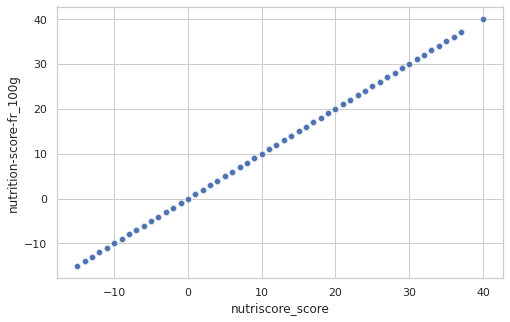

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)
sns.scatterplot(data=open_food_facts_optimized_data, x='nutriscore_score', y='nutrition-score-fr_100g')

In [ ]:
# construction d'un dataframe avec les nutriscores pour étudier leur différence et les NaN
nutriscore = open_food_facts_optimized_data['nutriscore_score']
nutriscore_fr = open_food_facts_optimized_data['nutrition-score-fr_100g']
diff = nutriscore-nutriscore_fr
diff_nutriscore = pd.DataFrame({'nutriscore_score': nutriscore, 'nutrition-score-fr_100g': nutriscore_fr, 'diff': diff})
diff_nutriscore['diff'].describe()

count    228371.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: diff, dtype: float64

In [ ]:
diff_nan = diff_nutriscore[diff_nutriscore['diff'].isna()]
diff_nan.describe()

,nutriscore_score,nutrition-score-fr_100g,diff
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


Les deux variables sont identiques, je fais le choix de garder 'nutriscore_score'.

Je supprime donc les variables qui ont été écartées.

In [22]:
variables_doublons_ecartees = ['brands', 'origins_tags', 'origins_en', 'manufacturing_places',
                               'countries', 'countries_tags', 'countries_en', 'additives_en', 'nutrition-score-fr_100g']

variables_ecartees = variables_ecartees + variables_doublons_ecartees

variables_conservees = [variable for variable in open_food_facts_optimized_data.columns.values 
                                    if variable not in variables_ecartees]

In [23]:
open_food_facts_optimized_data = open_food_facts_optimized_data[variables_conservees]

In [ ]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Data columns (total 26 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   product_name                             680448 non-null  object  
 1   brands_tags                              355831 non-null  category
 2   origins                                  40997 non-null   category
 3   manufacturing_places_tags                56382 non-null   category
 4   labels_en                                215476 non-null  category
 5   stores                                   113118 non-null  category
 6   ingredients_text                         201929 non-null  category
 7   additives_tags                           105572 non-null  category
 8   nutriscore_grade                         228371 non-null  category
 9   pnns_groups_1                            690995 non-null  category
 10  pnns_groups_2       

In [ ]:
open_food_facts_optimized_data.sample(30)

,product_name,brands_tags,origins,manufacturing_places_tags,labels_en,stores,ingredients_text,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
27560,Comte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,410.0,1715.0,34.000000,22.000000,0.000000,0.000000,NaN,26.00,0.80000,0.320000
168109,Miel bio de fleurs,famille-michaud,NaN,"famille-michaud-apiculteurs,domaine-saint-geor...","Organic,EU Organic,FR-BIO-01,AB Agriculture Bi...",Auchan,Miel,NaN,NaN,Sugary snacks,Sweets,0.0,0.0,0.0,NaN,2.0,304.0,1272.0,NaN,NaN,NaN,82.120003,0.20,0.30,0.01016,0.004064
249516,Mayonnaise,lesieur,NaN,NaN,NaN,NaN,"Huiles végétales (colza, tournesol), eau, vina...","en:e161b,en:e330,en:e385,en:e415",d,Fat and sauces,Dressings and sauces,4.0,0.0,1.0,18.0,4.0,660.0,2761.0,71.599998,5.600000,3.100000,2.000000,NaN,1.20,1.30000,0.520000
190496,Les vins du littoral,castelmaure-corbieres-2016,France,NaN,fr:Déconseillé aux femmes enceintes,Magasins U,NaN,NaN,NaN,NaN,Alcoholic beverages,NaN,NaN,NaN,NaN,NaN,85.0,356.0,0.002000,0.000200,0.500000,0.500000,0.01,0.02,0.00100,0.000400
115579,Gouda au cumin,ets-schoepfer-cs-20756-84035-avignon,NaN,NaN,NaN,NaN,"lait de vache, sel, ferments LACTIQUES, présur...",en:e251,d,Milk and dairy products,Cheese,1.0,0.0,0.0,16.0,3.0,376.0,1573.0,31.000000,21.000000,0.000000,0.000000,NaN,24.00,1.70000,0.680000
155538,Taillefine aux fruits,danone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408446,Goyave fruit du dragon,auchan,NaN,NaN,NaN,Auchan,NaN,NaN,e,Beverages,Sweetened beverages,NaN,NaN,NaN,13.0,NaN,42.0,176.0,0.500000,0.100000,9.800000,9.800000,NaN,0.50,0.01000,0.004000
654371,Torró crema torrada,alemany,NaN,NaN,NaN,NaN,NaN,NaN,d,Sugary snacks,Sweets,NaN,NaN,NaN,14.0,NaN,490.0,2050.0,28.000000,3.700000,47.000000,46.000000,6.10,10.00,0.05000,0.020000
411163,Torsade chocolat,casino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302035,Saint-Emilion Vieux Verdot,vieux-verdot,Bordelais,"saint-emilion,gironde",NaN,Gamm vert,Raisins noirs,NaN,NaN,NaN,Alcoholic beverages,0.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Suppression des variables impertinentes

In [24]:
variables_ecartees = ['origins', 'manufacturing_places_tags', 'stores', 'ingredients_text', 'ingredients_from_palm_oil_n',
                      'ingredients_that_may_be_from_palm_oil_n', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 
                      'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
                      'salt_100g', 'sodium_100g', 'product_name']

variables_conservees = [variable for variable in open_food_facts_optimized_data.columns.values 
                                    if variable not in variables_ecartees]

In [25]:
open_food_facts_optimized_data = open_food_facts_optimized_data[variables_conservees]

In [26]:
open_food_facts_optimized_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700690 entries, 0 to 700689
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   brands_tags       355831 non-null  category
 1   labels_en         215476 non-null  category
 2   additives_tags    105572 non-null  category
 3   nutriscore_grade  228371 non-null  category
 4   pnns_groups_1     690995 non-null  category
 5   pnns_groups_2     700585 non-null  category
 6   additives_n       201930 non-null  float32 
 7   nutriscore_score  228371 non-null  float32 
 8   nova_group        167562 non-null  float32 
dtypes: category(6), float32(3)
memory usage: 30.0 MB


# Gestion des lignes avec données manquantes

In [27]:
open_food_facts_optimized_data.describe(include='all')

,brands_tags,labels_en,additives_tags,nutriscore_grade,pnns_groups_1,pnns_groups_2,additives_n,nutriscore_score,nova_group
count,355831,215476,105572,228371,690995,700585,201930.000000,228371.000000,167562.000000
unique,47934,31403,27491,5,14,46,NaN,NaN,NaN
top,auchan,Organic,"en:e322,en:e322i",d,unknown,unknown,NaN,NaN,NaN
freq,9477,23259,5458,71767,437038,437038,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.583301,9.494069,3.413787
std,NaN,NaN,NaN,NaN,NaN,NaN,2.355338,8.748424,0.964747
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-15.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,10.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,16.000000,4.000000


Les variables sur les additifs sont les plus importantes, je vais donc chercher s'il y a des lignes avec une liste d'additifs mais sans nombre renseigné.

## Listes d'additifs renseignés

In [28]:
open_food_facts_optimized_data[open_food_facts_optimized_data['additives_tags'].notnull()]['additives_n'].describe()

count    105572.000000
mean          3.028417
std           2.499139
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          30.000000
Name: additives_n, dtype: float64

Toutes les listes d'additifs correspondent bien à un nombre d'additifs renseigné et le nombre d'additifs correspondant est bien supérieur à 0.

Les données sont donc cohérentes.

Supprimons les produits sans nombre d'additifs renseigné.

In [29]:
open_food_facts_optimized_data = open_food_facts_optimized_data[open_food_facts_optimized_data['additives_n'].notnull()]

In [30]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201930 entries, 2 to 700657
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   brands_tags       196263 non-null  category
 1   labels_en         108314 non-null  category
 2   additives_tags    105572 non-null  category
 3   nutriscore_grade  133192 non-null  category
 4   pnns_groups_1     197408 non-null  category
 5   pnns_groups_2     201930 non-null  category
 6   additives_n       201930 non-null  float32 
 7   nutriscore_score  133192 non-null  float32 
 8   nova_group        167125 non-null  float32 
dtypes: category(6), float32(3)
memory usage: 10.5 MB


## Lignes peu remplies

Je commence par calculer le nombre de valeurs remplies et le taux de remplissage pour chaque produit.

In [31]:
open_food_facts_optimized_data = open_food_facts_optimized_data.assign(
                                              nb_valeurs_remplies=lambda df: df.count(axis=1),
                                              # on retire 1 aux valeurs car la colonne ajoutée ci-dessus est comptée
                                              taux_remplissage=lambda df: round((df.count(axis=1)-1)/(len(df.columns)-1)*100))

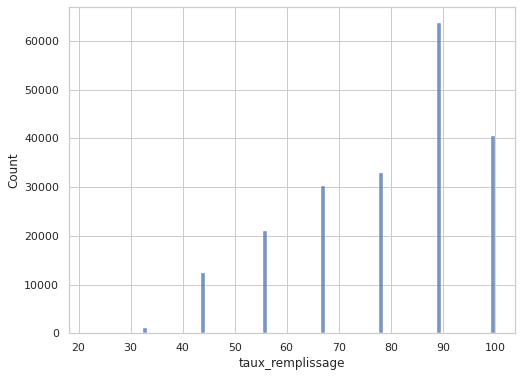

In [37]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.histplot(data=open_food_facts_optimized_data, x='taux_remplissage')

In [38]:
filtered_data = open_food_facts_optimized_data[open_food_facts_optimized_data['taux_remplissage'] > 80]

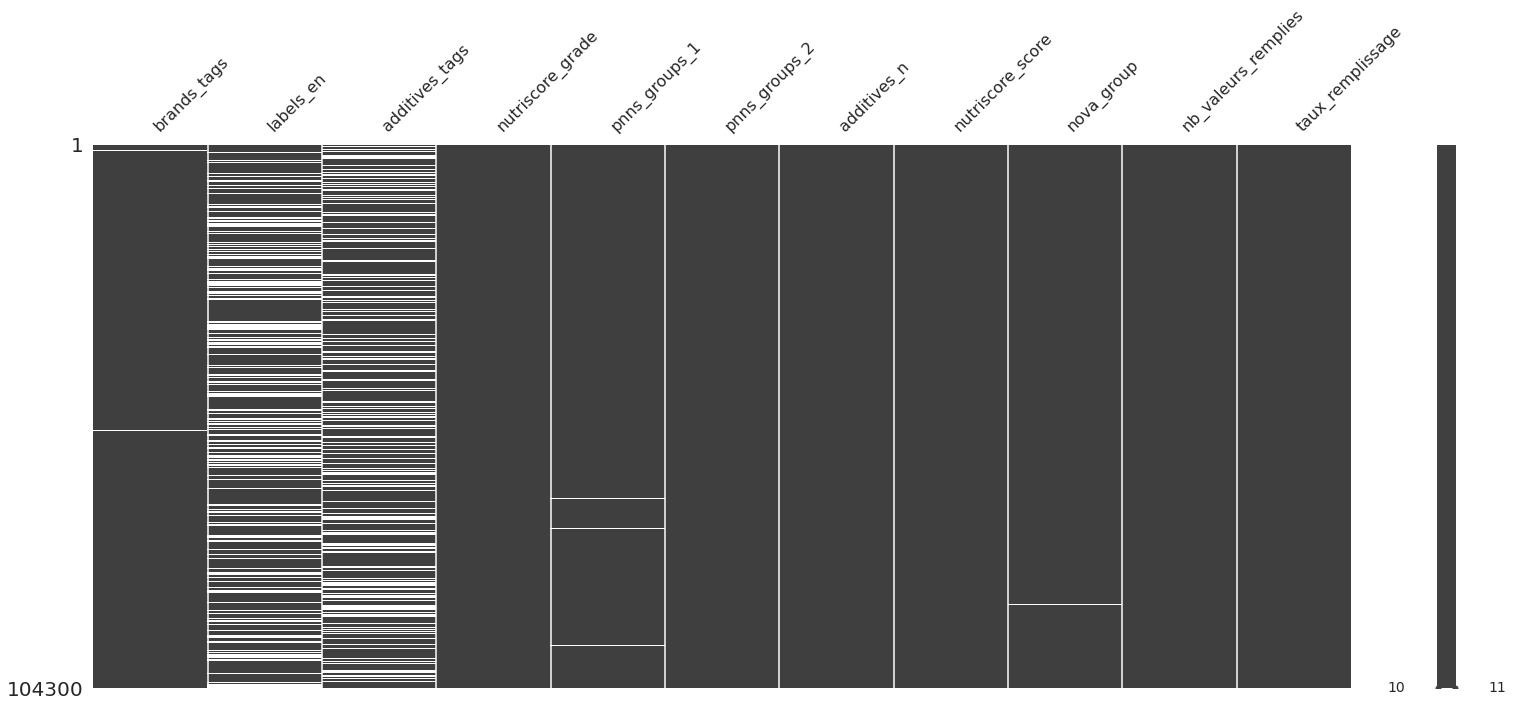

In [39]:
import missingno as msno
%matplotlib inline
msno.matrix(filtered_data)

In [40]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104300 entries, 64 to 700623
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   brands_tags          103844 non-null  category
 1   labels_en            71866 non-null   category
 2   additives_tags       73811 non-null   category
 3   nutriscore_grade     104300 non-null  category
 4   pnns_groups_1        104159 non-null  category
 5   pnns_groups_2        104300 non-null  category
 6   additives_n          104300 non-null  float32 
 7   nutriscore_score     104300 non-null  float32 
 8   nova_group           104067 non-null  float32 
 9   nb_valeurs_remplies  104300 non-null  int64   
 10  taux_remplissage     104300 non-null  float64 
dtypes: category(6), float32(3), float64(1), int64(1)
memory usage: 9.2 MB


Les produits ayant au moins 8 variables remplies seront conservés. En effet, cette décision permet de retenir plus de 100K produits. Ce qui est une bonne volumétrie pour réaliser des analyses. 

De plus, seules 2 variables sont un peu moins remplies que les autres à hauteur de 70K de valeurs non manquantes. Malgré que cela concerne la variable 'additives_tags', c'est un nombre acceptable. Les données manquantes de cette variable peuvent certainement signifier qu'il n'y a pas d'additif dans le produit. Cela sera étudié par la suite.

Je supprime donc les lignes avec moins de 8 variables remplies.

In [41]:
open_food_facts_optimized_data = filtered_data.drop(columns=['nb_valeurs_remplies', 'taux_remplissage'])

In [42]:
open_food_facts_optimized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104300 entries, 64 to 700623
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   brands_tags       103844 non-null  category
 1   labels_en         71866 non-null   category
 2   additives_tags    73811 non-null   category
 3   nutriscore_grade  104300 non-null  category
 4   pnns_groups_1     104159 non-null  category
 5   pnns_groups_2     104300 non-null  category
 6   additives_n       104300 non-null  float32 
 7   nutriscore_score  104300 non-null  float32 
 8   nova_group        104067 non-null  float32 
dtypes: category(6), float32(3)
memory usage: 7.7 MB


J'obtiens mon jeu de données filtré et prêt à être analysé. Il sera exporté pour les analyses.

# Export du dataset filtré

In [44]:
path = '/content/drive/MyDrive/Data/openfoodfacts_data_for_analysis.csv'
open_food_facts_optimized_data.to_csv(path, sep="\t")